<a href="https://colab.research.google.com/github/AndreKaled/classificacao-lixo-reciclagem/blob/main/Trash_Garbage_Type_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
trashnet_path = kagglehub.dataset_download('asdasdasasdas/garbage-classification')

print('TrashNet dataset import complete.')


100%|██████████| 82.0M/82.0M [00:02<00:00, 31.9MB/s]

Extracting files...


TrashNet dataset import complete.


<h2 style="font-family:camtasia;
          font-size:320%;
          font-weight: bold;
          color: #029db9;
          text-shadow: 2px 2px 2px rgba(0, 0, 0, 0.3);
          text-align:center;
          margin: 0 auto;
          padding:10px; ">
        Trash Type Detection usnig CNN
    </h2>

<div style="max-width: 100%;">
  <img src="https://lepageandsons.com/wp-content/uploads/2021/04/Garbage-Depositphotos_180449132_xl-2015-1210x423.jpg" style="width: 100%; height: auto;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
</div>

<a id="tc"></a>
       
<p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);
          background-size: 40% auto;
          font-family:camtasia;
          font-size:300%;
          font-weight: bold;
          color: #ffffff;
          text-align:center;
          text-shadow: 0px 0px 10px #000000;
          margin: 0 auto;
          border-radius:10px;
          padding:15px;
          box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
        Table of Content
    </p>

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

* <a href="#import" style="color: #208b9f; text-decoration: none;">Step 1 | Import Libraries</a>
* <a href="#read" style="color: #208b9f; text-decoration: none;">Step 2 | Reading Files</a>
* <a href="#gen" style="color: #208b9f; text-decoration: none;">Step 3 | Generate Data</a>
* <a href="#tt" style="color: #208b9f; text-decoration: none;">Step 4 | Split Train & Test Files</a>
* <a href="#arch" style="color: #208b9f; text-decoration: none;">Step 5 | Network Architecture</a>
* <a href="#compiler" style="color: #208b9f; text-decoration: none;">Step 6 | Compiler</a>
* <a href="#train" style="color: #208b9f; text-decoration: none;">Step 7 | Train Model</a>
* <a href="#evaluate" style="color: #208b9f; text-decoration: none;">Step 8 | Model Evaluation</a>
* <a href="#use" style="color: #208b9f; text-decoration: none;">Step 9 | using Model</a>

<a id="import"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740); background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px; padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 1 | Import Libraries</p>

In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 730.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 178.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:00:00


In [4]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.utils as utils
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from   tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from   tensorflow.keras.utils import plot_model
from   tensorflow.keras.callbacks import ModelCheckpoint
from   pathlib import Path
from   tensorflow.keras import models, layers, optimizers
from   sklearn.utils.class_weight import compute_class_weight


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [5]:
warnings.filterwarnings("ignore")

📄 [Back to Tabel of Contents](#tc)
<a id="read"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 2 | Reading Files</p>

In [6]:
data_path = trashnet_path

In [7]:
# Data Classes
print(os.listdir(data_path))

['garbage classification', 'one-indexed-files-notrash_val.txt', 'zero-indexed-files.txt', 'one-indexed-files-notrash_train.txt', 'one-indexed-files.txt', 'one-indexed-files-notrash_test.txt', 'Garbage classification']


In [8]:
main_folder_path = Path(data_path)

all_folders = [d for d in main_folder_path.glob('**/') if d.is_dir()]

# Count number of files in each class
data = []
for folder in all_folders:
    folder_name = folder.name
    file_count = len(list(folder.glob('*.*')))
    if folder_name != data_path:
        data.append({'Folder Name': folder_name, 'File Count': file_count})

count = pd.DataFrame(data)

count = count.set_index('Folder Name')
count

,File Count
Folder Name,
2,5
garbage classification,0
Garbage classification,0
Garbage classification,0
glass,501
cardboard,403
trash,137
metal,410
plastic,482


In [9]:
print(f'Total {count.sum()}')

Total File Count    5059
dtype: int64


In [10]:
# Show five image of each class
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(os.path.basename(item_dir))

In [17]:
# entra na pasta certa, contendo as pastas com as imagens
print(os.listdir(os.path.join(data_path, 'Garbage classification')))
data_path = os.path.join(data_path, 'Garbage classification')

['glass', 'cardboard', 'trash', 'metal', 'plastic', 'paper']


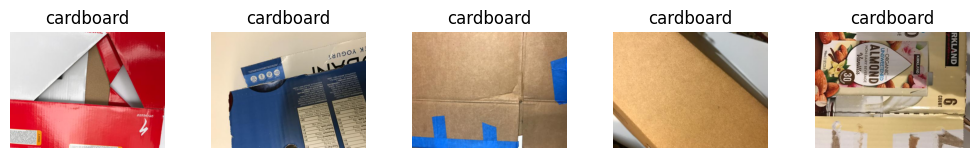

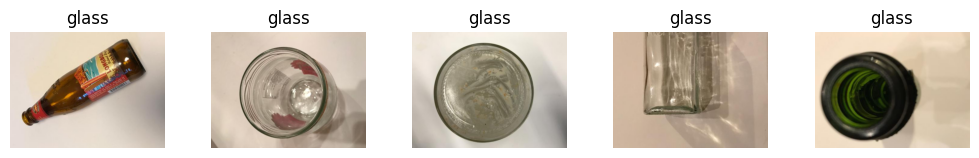

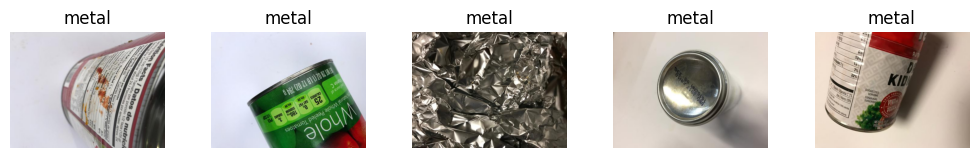

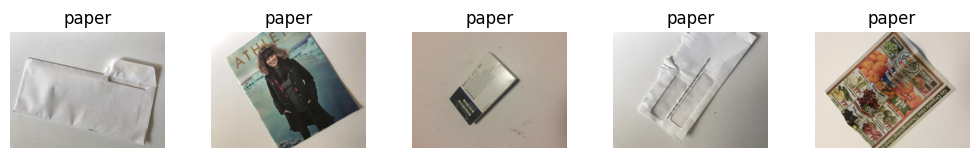

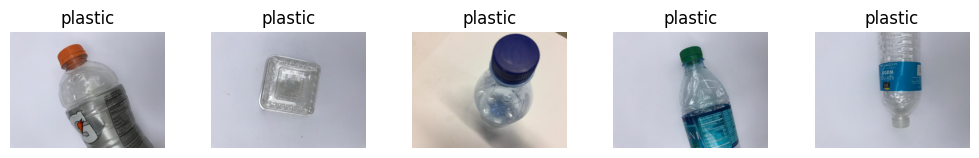

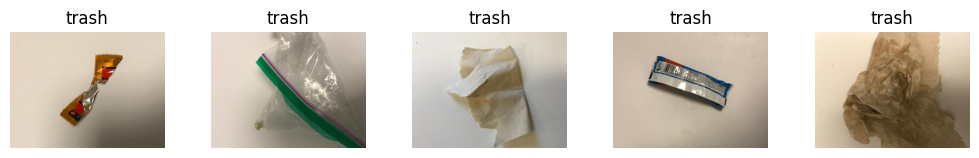

In [19]:
plot_imgs(data_path+'/cardboard')
plot_imgs(data_path+'/glass')
plot_imgs(data_path+'/metal')
plot_imgs(data_path+'/paper')
plot_imgs(data_path+'/plastic')
plot_imgs(data_path+'/trash')

📄 [Back to Tabel of Contents](#tc)
<a id="gen"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 3 | Generate Data</p>

In [37]:
# Define variable for requirements
batch_size = 30
target_size = (224, 224)
validation_split = 0.15

In [38]:
# Data Generators
train_img_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split=validation_split,
                                         horizontal_flip=True,
                                         vertical_flip=True,
                                         zoom_range = 0.5,
                                         width_shift_range = 0.3,
                                         height_shift_range = 0.3,
                                         rotation_range=50,
                                         shear_range = 0.3,
                                         fill_mode='nearest'
                                        )

test_data_img_generator = ImageDataGenerator(rescale=1./255,
                                             validation_split=validation_split
                                            )

📄 [Back to Tabel of Contents](#tc)
<a id="tt"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 4 | Split Train & Test Files</p>

In [39]:
# Separate train Data
train_data = train_img_generator.flow_from_directory(data_path,
                                                        subset="training",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 2150 images belonging to 6 classes.


In [40]:
# Separate validation Data
test_data = test_data_img_generator.flow_from_directory(data_path,
                                                        subset="validation",
                                                        seed=133,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                       )

Found 377 images belonging to 6 classes.


📄 [Back to Tabel of Contents](#tc)
<a id="arch"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 5 | Network Architecture</p>

Convolução -> Relu -> MaxPoolling (3 vezes)

Flatten -> Dense -> Dropout -> Dense -> softmax

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [42]:
plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


📄 [Back to Tabel of Contents](#tc)
<a id="compiler"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 6 | Compiler</p>

In [43]:
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [44]:
RLROP = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, min_lr=0.01)

In [45]:
MCH = ModelCheckpoint('trash.h5', monitor='val_loss', mode='min', save_best_only=True)

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

📄 [Back to Tabel of Contents](#tc)
<a id="train"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 7 | Train Model</p>

In [48]:
# tentando usar TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU detectada e inicializada com sucesso!")
except ValueError:
    strategy = tf.distribute.get_strategy()
    print("Rodando em CPU/GPU padrão.")

Rodando em CPU/GPU padrão.


In [49]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=500,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    callbacks=[ES, RLROP, MCH]
                   )

Epoch 1/500
43/72 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - categorical_accuracy: 0.3326 - loss: 1.5560

KeyboardInterrupt: 

📄 [Back to Tabel of Contents](#tc)
<a id="evaluate"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 8 | Model Evaluation</p>

In [ ]:
best_score = max(history.history['val_categorical_accuracy'] )
print(f"Best Validation score is: {best_score}")

In [ ]:
# Accuracy on train data :
accuracy = history.history['categorical_accuracy']

# Accuracy on test data :
val_accuracy = history.history['val_categorical_accuracy']
epochs = range(1, len(accuracy) + 1)  # Epochs

# Accuracy line plot :
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'b', label='train accuracy')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy')
plt.title('Accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

📄 [Back to Tabel of Contents](#tc)
<a id="use"></a>
       
# <p style="background-image: url(https://img.freepik.com/premium-vector/plastic-waste-ocean-pollution-seamless-pattern-vector-illustration-eco-problem-water-pollution-trash_98734-287.jpg?w=740);background-size: 40% auto;font-family:camtasia;font-size:150%;font-weight: bold;color: #ffffff;text-align:center;text-shadow: 0px 0px 10px #000000;margin: 0 auto;border-radius:10px;padding:7px;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">Step 9 |  Using Model</p>

In [ ]:
classes = train_data.class_indices
classes

In [ ]:
img = utils.load_img(
    'trash_images/paper/paper_010.jpg',
    grayscale=False,
    color_mode='rgb',
    target_size=(180, 180),
    interpolation='nearest',
    keep_aspect_ratio=False
)

img

In [ ]:
img = utils.img_to_array(img)
img = img / 255.0    # Normalize the image

result = model.predict(tf.expand_dims(img, axis=0))

classes = train_data.class_indices

for key, value in classes.items():
    if value == np.argmax(result):
        print(key)

<a id="contents_tabel"></a>

<div style="border-radius: 10px; padding: 15px; background-color: #d1f9ff; font-size: 100%; text-align: left;box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5); ">

You are welcome to try out the application built on this model :<br>    
    https://github.com/F-Mirfeizi/Trash-Detector